100
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Generating 5 clusters
0.006158740764516446


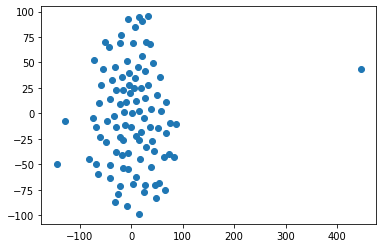

None


In [30]:
#!/usr/bin/python3
import feedparser

class Fetcher:
    """ Supplies the news articles """
    def __init__(self):
        pass

    def fetch(self, url):
        NewsFeed = feedparser.parse(url)
        print(len(NewsFeed.entries))
        entry = NewsFeed.entries[1] # list of entry objects

        #print(entry.keys())
        #print(entry.title)
        #print(entry.summary)
        #print(entry)
        return NewsFeed.entries

    def fetch(self):
        NewsFeed = feedparser.parse('https://www.channelnewsasia.com/rssfeeds/8395986') # ugly temp function for testing
        print(len(NewsFeed.entries))
        entry = NewsFeed.entries[1] # list of entry objects

        #print(entry.keys())
        #print(entry.title)
        #print(entry.summary)
        #print(entry)
        return NewsFeed.entries
    
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.metrics import silhouette_score

class Curator:
    
    

    def __init__(self):
        self.fetcher = Fetcher()
        pass

    
    def curate(self):
        articles = self.fetcher.fetch()
        
        corpus = [ x.summary for x in articles ]

        #print("Corpus: ", corpus)

        # calculate the tfidf document vectors
        tfidf_vectorizer = TfidfVectorizer()
        #tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(2, 3))
        tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
        print(tfidf_matrix.toarray())

        # apply kmeans clustering for classfication
        n_clusters = round(len(corpus) ** 0.5 * 0.5)
        print("Generating {} clusters".format(n_clusters))
        clustering_model = KMeans(  # create k-means model with custom config
            n_clusters=n_clusters,
            max_iter=300,
            precompute_distances="auto",
            n_jobs=-1
        )

        document_labels = clustering_model.fit_predict(tfidf_matrix) # array of cluster label by document

        # evaluate the clustering quality -1 is bad, 0 is overlap, 1 is good
        print(silhouette_score(tfidf_matrix, labels=document_labels))
        self.visualize_tfidf_matrix(tfidf_matrix)

        
    def visualize_tfidf_matrix(self, tfidf_matrix):
        # Visualisation (optional)
        # ----------------------------------------------------------------------------------------------------------------------
        X = tfidf_matrix.todense() # convert list of vectors into 2d matrix
        
        # first reduction using PCA (Principal Component Analysis)
        reduced_data = PCA(n_components=50).fit_transform(X)
        
#         labels_color_map = {
#             0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
#             5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
#         }
#         fig, ax = plt.subplots()
#         for index, instance in enumerate(reduced_data):
#             # print instance, index, labels[index]
#             pca_comp_1, pca_comp_2 = reduced_data[index]
#             color = labels_color_map[labels[index]]
#             ax.scatter(pca_comp_1, pca_comp_2, c=color)
#         plt.show()

        # second reduction using t-SNE (t-Distributed Stochastic Neighbouring Entities)
        embeddings = TSNE(n_components=2)
        Y = embeddings.fit_transform(X)
        plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
        plt.show()

        
        
if __name__ == '__main__':
    curator = Curator()
    print(curator.curate())
